[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Humboldt-WI/bads/blob/master/tutorials/4_nb_data_preparation.ipynb) 

# Chapter 4 Data preparation

In this tutorial, you will further deepen your understanding of **Pandas**, the goto library for working with tabular data in Python. We will draw on [Tutorial 1](https://github.com/Humboldt-WI/bads/blob/master/tutorials/1_nb_python_intro.ipynb), which introduced the two core Pandas classes *data series* and *dataframe*, and demonstrate how to use dataframes for loading and manipulating data. To that end, the tutorial introduces a real-world data associated with credit scoring. 

The second part of the tutorial revisits our fourth lecture on **data preparation**. We will see how Pandas dataframes natively performs basic data preparation operations such as replacing missing values, and how this functionality can be extended to handle outliers and categorical data, amongst others. 

Finally, the tutorial demonstrate basic and advanced ways to chart data for **explanatory data analysis**. 

The outline of the tutorial is as follows:
- The HMEQ data set
- Pandas reloaded ...
- Data preparation
- Explanatory data analysis

Before moving on, let's import some of our standard library so that we have them ready when we need them.

In [1]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
# Some configuration of the plots we will create later
%matplotlib inline  
plt.rcParams["figure.figsize"] = (12,6)

## The HMEQ data set
Our data set, called the  "Home Equity" or, in brief, HMEQ data set, is provided by www.creditriskanalytics.net. It comprises  information about a set of borrowers, which are categorized along demographic variables and variables concerning their business relationship with the lender. A binary target variable called 'BAD' is  provided and indicates whether a borrower has repaid her/his debt. You can think of the data as a standard use case of binary classification.

You obtain the data, together with other interesting finance data sets, directly from www.creditriskanalytics.net. The website also provides a brief description of the data set. Specifically, the data set consists of 5,960 observations and 13 features including the target variable. The variables are defined as follows:

- BAD: the target variable, 1=default; 0=non-default 
- LOAN: amount of the loan request
- MORTDUE: amount due on an existing mortgage
- VALUE: value of current property
- REASON: DebtCon=debt consolidation; HomeImp=home improvement
- JOB: occupational categories
- YOJ: years at present job
- DEROG: number of major derogatory reports
- DELINQ: number of delinquent credit lines
- CLAGE: age of oldest credit line in months
- NINQ: number of recent credit inquiries
- CLNO: number of credit lines
- DEBTINC: debt-to-income ratio

As you can see, the features aim at describing the financial situation of a borrower. We will keep using the data set for many modeling tasks in this tutorial and future tutorial. So it makes sense to familiarize yourself with the above features. Make sure you understand what type of information they provide and what this information might reveal about the risk of defaulting.  

---

## Pandas reloaded
You have already seen the Pandas library in action in [Tutorial 2](https://github.com/Humboldt-WI/bads/blob/master/tutorials/2_nb_descriptive_analytics.ipynb). There, however, we used data series and frames to store synthetic data that we created for the purpose of demonstration. The much more common use case is to load data that already exists on disk, a cloud drive, on the web, etc.

Loading such data into a `DataFrame` means that you load it into the main memory of your computer and can subsequently work with it. Note that loading larger data sets can take a long time and that they will consume a sizeable part of your main computer memory. More on that later. The HMEQ data should not challenge your PC ;)

Remember that we have to load the Pandas library prior to using its classes. Let's do so and then examine a few options to load data. 

In [2]:
import pandas as pd 

### Loading data from disk
Say you have downloaded the data to your hard disk. It will be stored in some format in some folder somewhere on your computer. A common format for small data sets is the **csv** format, meaning comma separated values. This is also the format of our data. Before moving on, use a text editor to open the data and take a look at the format of the file. This is clarify what is meant by csv.

Pandas supports a variety of standard data formats including csv. To load the data, you will need to specify the full path to data file on your hard disk. The easiest way to do so is to put the data into your current working directory. Roughly speaking, this is the directory in which the Python interpreted is looking for files. You can identify the working directory as follows.

In [3]:
import os  # operating system interface 
print(os.getcwd())

C:\Users\Stefan Lessmann\Google Drive\notebooks\Git\bads\tutorials


Once we know where to find the file, we can load the data into a Pandas `DataFrame`. Recall that a data frame is basically a container for data. It is stored in memory and facilitates querying and manipulating tabular data. Note that the following code would also work if the data were not stored as a .csv file but as a zip archive. That is useful as it allows you to store larger data set in a compressed format (e.g., zip).

In [4]:
# You have to update the code such that the variable file includes the correct path to the csv file on your computer
file = '../data/hmeq.csv'
df = pd.read_csv(file)

To convince yourself that data loading was successful, you can simply make Python outputting a summary of the data by typing the variable name of the data frame object; that is `df` in the example.

In [5]:
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


Before discussing the above output, let's first showcase another way to load the data. 

### Loading data from the web
Surprisingly, loading data stored somewhere on the web is even easier compared to loading data from disk because we do not have to worry so much where exactly the data is stored. All we need to do is to give Pandas an URL. To demonstrate this, we keep a copy of the HMEQ data set in the data folder of the [BADS Github repo](https://github.com/Humboldt-WI/bads/). The following code loads the data directly from the repo.

In [6]:
# Load the data directly from GitHub
data_url = 'https://raw.githubusercontent.com/Humboldt-WI/bads/master/data/hmeq.csv'
df = pd.read_csv(data_url)
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


### Eyeballing data 
The Pandas data frame provides a ton of useful functions for data handling. We begin with showcasing some standard functions that one needs every time when working with data. This also allows us to re-visit some of the functions that we have seen in the Pandas part of the Python introduction (i.e., [Tutorial 1](1_nb_python_intro)). 

In [7]:
# Query some properties of the data
print('Dimensionality of the data is {}'.format(df.shape))  # .shape returns a tupel
print('The data set has {} cases.'.format(df.shape[0]))     # we can also index the elements of that tupel
print('The total number of elements is {}.'.format(df.size))

Dimensionality of the data is (5960, 13)
The data set has 5960 cases.
The total number of elements is 77480.


In [8]:
# Preview of the first n rows (similar to just typing the variable name as above but with more control)
df.head(n=5)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [9]:
# Similarily, you can inspect the last rows
df.tail(n=5)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


In [10]:
# Obtain a more technical overview of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


The above output displays some useful information how exactly data is stored. We learn about the data type of each feature (i.e, each *data series* object), missing values, and the total amount of memory that the data consumes.

In [11]:
# Produce summary statistics (to R-programmers: this is equivalent to the famous R function summary())
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


The previous demos gave as an overview of the data. However, if you compare the output to the `describe()` function list of features given on the www.creditriskanalytics.net website (see above), you will notice that we are missing some features. For example, we lack a summary of the feature *REASON*; same with *JOB*. If you think about it, that actually makes sense. The result from the function `info()` showed how these features are stored as data type *object*. They are not stored as numeric variables. Consequently, statistical / mathematical operations like computing a mean or quantile are undefined and cannot be computed for these variables. That said, you can still force the `describe()` function to consider all features in its output. 

In [12]:
# The argument include all ensures that non-numeric variables are also shown
df.describe(include='all')

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5708,5681,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
unique,NaN,NaN,NaN,NaN,2,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,DebtCon,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,3928,2388,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.199497,18607.969799,73760.817200,101776.048741,NaN,NaN,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,NaN,NaN,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,NaN,NaN,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,NaN,NaN,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,NaN,NaN,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141


You can also calculate a summary statistic for each column individually by using the corresponding method, all methods can be found in the [Pandas reference](https://pandas.pydata.org/docs/reference/frame.html). In the below example, do not worry about the `sep` argument in the `print()` function. It just inserts two empty lines to make the output more readable.

In [13]:
print(df.mean(), df.median(), sep="\n\n")  

BAD             0.199497
LOAN        18607.969799
MORTDUE     73760.817200
VALUE      101776.048741
YOJ             8.922268
DEROG           0.254570
DELINQ          0.449442
CLAGE         179.766275
NINQ            1.186055
CLNO           21.296096
DEBTINC        33.779915
dtype: float64

BAD            0.000000
LOAN       16300.000000
MORTDUE    65019.000000
VALUE      89235.500000
YOJ            7.000000
DEROG          0.000000
DELINQ         0.000000
CLAGE        173.466667
NINQ           1.000000
CLNO          20.000000
DEBTINC       34.818262
dtype: float64


C:\temp\ipykernel_25012\2351728271.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.mean(), df.median(), sep="\n\n")
C:\temp\ipykernel_25012\2351728271.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.mean(), df.median(), sep="\n\n")


### Aggregation and grouping
The `describe()` function already introduces functionality that aggregates the data in a data frame. Aggregations are extremely useful in EDA and for feature engineering. One of the function that you need to know when it comes to aggregations is `value_counts()`. Our data represents a classification problem. So you would want to know the relative frequencies of the target variable values. This is only one of the many useful ways in which you can leverage the function.   

In [14]:
# Count the frequency of good and bad credit risks
df.BAD.value_counts()

0    4771
1    1189
Name: BAD, dtype: int64

Ok, knowing the good to bad ratio is clearly useful. Another standard question for classification problems would be how feature values distribute across the classes (i.e., good and bad borrowers). Time to introduce yet another important Python function: `group_by()`. You might remember the *group by* clause from SQL. Data frames offer similar functionality. The function is quite powerful. We could have a whole tutorial only on `group_by()`. Fortunately, such tutorial already exists (see, e.g., [here](https://realpython.com/pandas-groupby/) or check out the [official documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)). For now, we leave it with a simple demo to sketch what you can do with `group_by()` 

In [15]:
df.groupby("BAD")["LOAN"].mean()

BAD
0    19028.107315
1    16922.119428
Name: LOAN, dtype: float64

We just calculated the mean loan amount using the target variable for grouping. We find that bad clients borrow less money than good clients, on average. The lender might be pleased to know that. Better than the opposite result, right? But let's not dive too deep into financial implications. Our point was to showcase grouping. Let's extend the demo.

In [16]:
# We can group multiple features in one go
df.groupby("BAD")[["LOAN", "MORTDUE", "VALUE"]].mean()

,LOAN,MORTDUE,VALUE
BAD,,,
0,19028.107315,74829.249055,102595.921018
1,16922.119428,69460.452973,98172.846227


In [17]:
# We can use any aggregation function that Pandas supports, including the median
df.groupby("BAD")[["LOAN", "MORTDUE", "VALUE"]].median()

,LOAN,MORTDUE,VALUE
BAD,,,
0,16900.0,66839.0,90659.0
1,14900.0,60279.0,82000.0


In [18]:
# or computing quantiles
df.groupby("BAD")[["LOAN", "MORTDUE", "VALUE"]].quantile(q=0.95)

,LOAN,MORTDUE,VALUE
BAD,,,
0,39550.0,150051.6,202751.10
1,41080.0,159950.0,212279.25


In [19]:
# and in case you wonder, the output that we received from the above demos is just a Pandas series object
type(df.groupby("BAD")["LOAN"].mean())

pandas.core.series.Series

### Navigating data
We discussed indexing numpy arrays and Pandas data frames in [Tutorial 1](https://github.com/Humboldt-WI/bads/blob/master/tutorials/1_nb_python_intro.ipynb). However, indexing is such a crucial part of working with data that it make sense to refresh our minds by including a few more demos. We will only illustrate some more popular options. A web search for "pandas data frame indexing" will provide many additional insights if you are interested. Likewise, feel free to skip this part if you already feel comfortable with data frame indexing.

#### Basic indexing of rows and columns

In [20]:
# Accessing a single column by name
df['BAD']
# Alternatively
df.BAD

0       1
1       1
2       1
3       1
4       0
       ..
5955    0
5956    0
5957    0
5958    0
5959    0
Name: BAD, Length: 5960, dtype: int64

In [21]:
# R-style indexing of selected rows and columns
df.loc[0:4, ["BAD", "LOAN"]]  

,BAD,LOAN
0,1,1100
1,1,1300
2,1,1500
3,1,1500
4,0,1700


In [22]:
# Access columns by a numerical index
df.iloc[0:4, 0]
df.iloc[0:4, [0, 3, 5]]
df.iloc[0:4, np.arange(4)]

,BAD,LOAN,MORTDUE,VALUE
0,1,1100,25860.0,39025.0
1,1,1300,70053.0,68400.0
2,1,1500,13500.0,16700.0
3,1,1500,NaN,NaN


A few cautionary notes on numerical indexing in Python. The function `iloc()` considers the index of the data frame. In the above output, this is the left-most column without header. We have not defined a custom row index and Python uses consecutive integer numbers by default. However, a data frame could also have a custom index. In such a case, calls to `iloc()` need to refer to the custom index. It is good practice to eyeball a data frame and verify the way in which rows are indexed prior to using `iloc()`.
<br>

#### Other common forms of indexing and subset selection
It is also common practice to select rows based on comparisons of feature values.

In [23]:
q = "NINQ>10"  # our query using the variable NINQ
tmp = df.query(q)
print('Number of applicants with {} is {}.'.format(q, tmp.shape[0]))
tmp

Number of applicants with NINQ>10 is 16.


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
44,1,3000,NaN,14500.0,HomeImp,Other,3.0,0.0,0.0,9.300000,14.0,2.0,NaN
518,1,7200,54600.0,65000.0,DebtCon,Other,14.0,2.0,1.0,98.433333,11.0,9.0,NaN
1547,1,11300,56602.0,71500.0,DebtCon,Office,11.0,2.0,1.0,52.800000,12.0,20.0,NaN
1673,0,11900,71000.0,87000.0,DebtCon,Mgr,20.0,0.0,0.0,238.466667,11.0,24.0,NaN
2335,1,14100,43927.0,60000.0,DebtCon,Other,0.0,0.0,0.0,0.000000,12.0,8.0,NaN
2593,1,15000,NaN,26100.0,DebtCon,Other,1.6,0.0,1.0,105.466667,17.0,20.0,NaN
2599,1,15000,16400.0,205950.0,DebtCon,Mgr,10.0,8.0,3.0,135.933333,11.0,42.0,NaN
2748,0,15500,71412.0,93723.0,DebtCon,Mgr,19.0,0.0,0.0,238.501316,11.0,24.0,35.965898
2798,0,15700,79346.0,93472.0,DebtCon,Mgr,19.0,0.0,0.0,244.476057,11.0,23.0,33.196412
3661,1,19300,109000.0,135000.0,DebtCon,Office,3.0,0.0,0.0,98.433333,13.0,14.0,NaN


Alternatively, we can also use the function `loc()` for logical indexing. Here, we query all bad applicants and output the values of three features. 

In [24]:
df.loc[df.BAD == 1, ['LOAN', 'JOB', 'YOJ']]

,LOAN,JOB,YOJ
0,1100,Other,10.5
1,1300,Other,7.0
2,1500,Other,4.0
3,1500,NaN,NaN
5,1700,Other,9.0
...,...,...,...
5930,72300,Other,1.0
5931,75400,Other,1.0
5932,76500,Other,12.0
5933,77200,Self,8.0


### Manipulating data
Data preparation (see next) will require us to change the data stored in a data frame. Let's introduce some functionality and concepts. 

#### The inplace Argument
When altering values in a data frame, you should know the argument `inplace`. Many function that result in changes support this argument. If set to `True`, whatever change was made to the data, it will be reflected right in the data frame. If set to `false`, on the other hand, the data frame to which the function was applied will not change. Instead, the function will only return a new data frame, which incorporates the change. Ok, that sounds rather theoretical. Let's look at an example. Consider the following call of the `sort_values` function. 

In [25]:
df.sort_values(by="VALUE", ascending=False)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5752,1,43500,NaN,855909.0,HomeImp,Other,16.0,0.0,0.0,196.403636,0.0,23.0,42.985408
5707,1,41700,NaN,854114.0,HomeImp,Other,18.0,0.0,0.0,189.099378,1.0,23.0,43.258779
5706,1,41700,NaN,854112.0,HomeImp,Other,16.0,0.0,0.0,180.608878,0.0,23.0,42.071645
5665,1,40000,NaN,850000.0,HomeImp,Other,17.0,0.0,0.0,186.666667,1.0,24.0,NaN
5586,1,36600,397299.0,512650.0,DebtCon,ProfExe,4.0,0.0,0.0,197.516684,0.0,21.0,43.458327
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,1,50000,26976.0,NaN,DebtCon,Mgr,8.3,1.0,0.0,111.600000,1.0,6.0,NaN
5818,1,50000,106000.0,NaN,DebtCon,Mgr,0.8,0.0,2.0,252.633333,3.0,32.0,NaN
5822,1,50000,30338.0,NaN,DebtCon,Mgr,8.0,0.0,0.0,91.431005,0.0,5.0,35.084001
5826,1,50100,256431.0,NaN,NaN,Other,0.0,0.0,4.0,142.343205,2.0,25.0,3.342570


The purpose of `sort_values` is fairly obvious. Good to know this function exists. However, the point of the demo was to show that we obtain a changed data frame. Inspect the index (left-most column). We have changed the rows in the data frame by sorting, right. But have we really? Let's output the data frame one more time as we usefully do. 

In [26]:
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


Ok, this is the original row oder. Consequently, we **have not** changed the data frame by calling `sort_values`. Rather, the function has created a new data frame with the same content of the original one but altered row order. Let's make this more explicit.

In [27]:
df_changed = df.sort_values(by="VALUE", ascending=False)  # this statement does not produce any output

In [28]:
df_changed  

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5752,1,43500,NaN,855909.0,HomeImp,Other,16.0,0.0,0.0,196.403636,0.0,23.0,42.985408
5707,1,41700,NaN,854114.0,HomeImp,Other,18.0,0.0,0.0,189.099378,1.0,23.0,43.258779
5706,1,41700,NaN,854112.0,HomeImp,Other,16.0,0.0,0.0,180.608878,0.0,23.0,42.071645
5665,1,40000,NaN,850000.0,HomeImp,Other,17.0,0.0,0.0,186.666667,1.0,24.0,NaN
5586,1,36600,397299.0,512650.0,DebtCon,ProfExe,4.0,0.0,0.0,197.516684,0.0,21.0,43.458327
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,1,50000,26976.0,NaN,DebtCon,Mgr,8.3,1.0,0.0,111.600000,1.0,6.0,NaN
5818,1,50000,106000.0,NaN,DebtCon,Mgr,0.8,0.0,2.0,252.633333,3.0,32.0,NaN
5822,1,50000,30338.0,NaN,DebtCon,Mgr,8.0,0.0,0.0,91.431005,0.0,5.0,35.084001
5826,1,50100,256431.0,NaN,NaN,Other,0.0,0.0,4.0,142.343205,2.0,25.0,3.342570


We create a variable, `df_changed` that points to the altered data frame. In this variable, the changes are persistent. What you will see quite often in Python is a statement like this one.

In [29]:
df_changed = df_changed.sort_values(by="VALUE", ascending=True) 

Here, we apply a function that changes our data and we overwrite the original data frame with the changed version. That works well. A possible pitfall is to make a change to the data and to expect that change to affect the original data without the assignment. We have seen above that this does not happen. However, many functions including `sort_values` support the argument `inplace`. Consider this example:

In [30]:
df_demo = df.copy()  # we do not want to really change our data so let's make a copy
df_demo

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [31]:
# This is the interesting part
df_demo.sort_values("VALUE", ascending=True, inplace=True)  # the changes from sorting will directly affect our data
df_demo

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
3538,0,18600,57300.0,8000.0,DebtCon,Other,6.0,NaN,NaN,68.000000,1.0,17.0,NaN
40,1,3000,NaN,8800.0,HomeImp,Other,2.0,0.0,1.0,77.766667,0.0,3.0,NaN
156,1,5000,NaN,9100.0,HomeImp,Other,1.0,0.0,0.0,54.733333,2.0,8.0,NaN
213,1,5200,NaN,9500.0,DebtCon,Other,1.0,0.0,1.0,81.100000,1.0,2.0,NaN
940,1,9100,NaN,11550.0,HomeImp,Other,NaN,0.0,0.0,51.933333,1.0,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,1,50000,26976.0,NaN,DebtCon,Mgr,8.3,1.0,0.0,111.600000,1.0,6.0,NaN
5818,1,50000,106000.0,NaN,DebtCon,Mgr,0.8,0.0,2.0,252.633333,3.0,32.0,NaN
5822,1,50000,30338.0,NaN,DebtCon,Mgr,8.0,0.0,0.0,91.431005,0.0,5.0,35.084001
5826,1,50100,256431.0,NaN,NaN,Other,0.0,0.0,4.0,142.343205,2.0,25.0,3.342570


I can imagine that you found the demo a little theoretical. So much to know about Pandas, not to mention other libraries... Let's agree on the following, whenever you manipulate data in a data frame, remember there was this weird thing of whether changes affect the data frame or not. That would already by enough. `inplace` is one way of enacting a change of the data but more importantly I want you to remember that an operation might or might not alter a data frame. Remembering this bit will help you a lot when progressing with Python; trust me. 

#### The apply function
More functionality that you need to know... It's getting a lot, right. Well, the good thing is that you can always come back to this notebook to look-up certain functions. That is the main reason why the notebook is so comprehensive, or long.
<br>
If you have used R, you will know the `apply()` function. It kinda does what the name suggests. It let's you define a function, either a custom one or one that already exist in Python, and apply that function to every element in a data frame. Combine that with indexing and you obtain a powerful way to selectively alter your data. 
<br>
We provide some demos in the following. To avoid corrupting our data frame, which we will need later, all demos use a copy. And for simplicity, we consider only the numerical features. 

In [88]:
df_demo = df.select_dtypes(float) 

Say you want to square the values of all your features. Why you would want to do that? No idea, this is a demo so bear with it. Specifically, we showcase different forms of using `apply`. All three examples perform the same task, squaring all features in the data; which, you are right, is a pointless operation. Did I mention that this is a demo. 

In [89]:
# Using apply together with an existing function
df_demo.apply(np.square) # you can define a function directly like here, we have a square function

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1.210000e+06,6.687396e+08,1.522951e+09,110.25,0.0,0.0,8905.068359,1.0,81.0,1212.311279
1,1.690000e+06,4.907423e+09,4.678560e+09,49.00,0.0,4.0,14843.361328,0.0,196.0,1212.311279
2,2.250000e+06,1.822500e+08,2.788900e+08,16.00,0.0,0.0,22340.283203,1.0,100.0,1212.311279
3,2.250000e+06,4.227470e+09,7.962974e+09,49.00,0.0,0.0,30090.681641,1.0,400.0,1212.311279
4,2.890000e+06,9.564840e+09,1.254400e+10,9.00,0.0,0.0,8711.111328,0.0,196.0,1212.311279
...,...,...,...,...,...,...,...,...,...,...
5955,3.588010e+09,3.279166e+09,8.133334e+09,256.00,0.0,0.0,49199.105469,0.0,256.0,1304.101562
5956,3.588010e+09,2.978540e+09,8.637286e+09,256.00,0.0,0.0,43552.375000,0.0,225.0,1285.937500
5957,3.588010e+09,2.920862e+09,8.634870e+09,225.00,0.0,0.0,45062.667969,0.0,225.0,1264.271118
5958,3.588010e+09,2.537137e+09,8.438444e+09,196.00,0.0,0.0,45750.093750,0.0,256.0,1179.296143


In [90]:
# Using apply together with a customer function
def my_square(x):
    return x*x

df_demo.apply(my_square) 

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1.210000e+06,6.687396e+08,1.522951e+09,110.25,0.0,0.0,8905.068359,1.0,81.0,1212.311279
1,1.690000e+06,4.907423e+09,4.678560e+09,49.00,0.0,4.0,14843.361328,0.0,196.0,1212.311279
2,2.250000e+06,1.822500e+08,2.788900e+08,16.00,0.0,0.0,22340.283203,1.0,100.0,1212.311279
3,2.250000e+06,4.227470e+09,7.962974e+09,49.00,0.0,0.0,30090.681641,1.0,400.0,1212.311279
4,2.890000e+06,9.564840e+09,1.254400e+10,9.00,0.0,0.0,8711.111328,0.0,196.0,1212.311279
...,...,...,...,...,...,...,...,...,...,...
5955,3.588010e+09,3.279166e+09,8.133334e+09,256.00,0.0,0.0,49199.105469,0.0,256.0,1304.101562
5956,3.588010e+09,2.978540e+09,8.637286e+09,256.00,0.0,0.0,43552.375000,0.0,225.0,1285.937500
5957,3.588010e+09,2.920862e+09,8.634870e+09,225.00,0.0,0.0,45062.667969,0.0,225.0,1264.271118
5958,3.588010e+09,2.537137e+09,8.438444e+09,196.00,0.0,0.0,45750.093750,0.0,256.0,1179.296143


In [91]:
# Using apply together with a lamda function
df_demo.apply(lambda x: x * x) # you can define a function directly like here, we have a square function

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1.210000e+06,6.687396e+08,1.522951e+09,110.25,0.0,0.0,8905.068359,1.0,81.0,1212.311279
1,1.690000e+06,4.907423e+09,4.678560e+09,49.00,0.0,4.0,14843.361328,0.0,196.0,1212.311279
2,2.250000e+06,1.822500e+08,2.788900e+08,16.00,0.0,0.0,22340.283203,1.0,100.0,1212.311279
3,2.250000e+06,4.227470e+09,7.962974e+09,49.00,0.0,0.0,30090.681641,1.0,400.0,1212.311279
4,2.890000e+06,9.564840e+09,1.254400e+10,9.00,0.0,0.0,8711.111328,0.0,196.0,1212.311279
...,...,...,...,...,...,...,...,...,...,...
5955,3.588010e+09,3.279166e+09,8.133334e+09,256.00,0.0,0.0,49199.105469,0.0,256.0,1304.101562
5956,3.588010e+09,2.978540e+09,8.637286e+09,256.00,0.0,0.0,43552.375000,0.0,225.0,1285.937500
5957,3.588010e+09,2.920862e+09,8.634870e+09,225.00,0.0,0.0,45062.667969,0.0,225.0,1264.271118
5958,3.588010e+09,2.537137e+09,8.438444e+09,196.00,0.0,0.0,45750.093750,0.0,256.0,1179.296143


So this was apply in action. By the way, do you think any of the above examples did actually change the data frame? 
<br>
Hopefully, the examples have sufficed to let you appreciate the beauty of `apply`. Writing your own custom function and then feeding every column of a data frame or a selection thereof - by indexing - let you perform some powerful operations. Again, for now, know that `apply()` exist. We will see more meaningful use cases as we go along (spoiler alert: we use `apply()` for outlier handling below) 

### Saving data to disk
Saving is the natural complement to reading data. So for the sake of completeness, let's briefly exemplify one approach to store data using the `to_csv()` function.
<br>
The use of the function is straightforward. It receives a file name, possibly together with a specific path, and that is pretty much it. You can decide whether you want to index column to be stored together with the data. Since our index is just a consecutive list of integer numbers, we do not store the index and save a little bit of space.   

In [92]:
# Store the data in the present, pre-processed format
df.to_csv('./hmeq_prepared.csv', index=False)

Storing data in csv format might not be the best idea. Explore the Pandas library to check out other functions `to_xyz()` that facilitate writing data. `Pickle` and `hdf` are popular formats / modes of writing data in a binary format. Storing data in binary format will substantially reduce the size of the data file on disk and is also more efficient (e.g., faster reading and writing). We won't detail these formats here as we do not need them for the BADS lecture. Still, feel free to web search for, e.g., "Pandas data storage", to find resources [like this one](https://towardsdatascience.com/the-best-format-to-save-pandas-data-414dca023e0d), which offer more information.  

---

## Data preparation
Data preparation is a mega-topic. It will accompany us in one way or the other throughout the whole course. At this point, we will address some typical issues in our data and, in doing so, demonstrate how to perform standard data prep tasks using Python and Pandas. 

### Altering data types
We start with a rather technical bit, data types. Remember the way our data is stored at the moment. 

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   BAD        5960 non-null   bool    
 1   LOAN       5960 non-null   float32 
 2   MORTDUE    5960 non-null   float32 
 3   VALUE      5960 non-null   float32 
 4   REASON     5960 non-null   category
 5   JOB        5960 non-null   category
 6   YOJ        5960 non-null   float32 
 7   DEROG      5960 non-null   float32 
 8   DELINQ     5960 non-null   float32 
 9   CLAGE      5960 non-null   float32 
 10  NINQ       5960 non-null   float32 
 11  CLNO       5960 non-null   float32 
 12  DEBTINC    5960 non-null   float32 
 13  DELINQcat  5960 non-null   category
 14  DEROGzero  5960 non-null   bool    
dtypes: bool(2), category(3), float32(10)
memory usage: 262.5 KB


The features *JOB* and *REASON* are stored as data type `object`. This is the most general data type in Python. A variable of this type can store pretty much any piece of data, numbers, text, dates, times, ... This generality has a price. The data type consumes a lot of memory. Further using a more specialized data type unlocks specific functionality, which is available only for that data type. Functions to manipulate text are an example. These are available for data of type `string`. 
<br>
In our case, the two features that Pandas stores as objects are actually categorical variables. We can easily verify this using `value_counts`, amongst others.

In [94]:
df.REASON.value_counts()  # so REASON is a binary variable

DebtCon      3928
HomeImp      1780
IsMissing     252
Name: REASON, dtype: int64

In [95]:
df.JOB.value_counts()  # whereas JOB is a multinomial variable 

Other      2667
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64

Knowing our two "object features" are categories, we should alter their data type accordingly. To that end, we make use of the function `astype`, which facilitates converting one data type into another. 

In [96]:
# Code categories properly 
df['REASON'] = df['REASON'].astype('category')
df['JOB'] = df['JOB'].astype('category')
df.info()  # verify the conversion was successful

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   BAD        5960 non-null   bool    
 1   LOAN       5960 non-null   float32 
 2   MORTDUE    5960 non-null   float32 
 3   VALUE      5960 non-null   float32 
 4   REASON     5960 non-null   category
 5   JOB        5960 non-null   category
 6   YOJ        5960 non-null   float32 
 7   DEROG      5960 non-null   float32 
 8   DELINQ     5960 non-null   float32 
 9   CLAGE      5960 non-null   float32 
 10  NINQ       5960 non-null   float32 
 11  CLNO       5960 non-null   float32 
 12  DEBTINC    5960 non-null   float32 
 13  DELINQcat  5960 non-null   category
 14  DEROGzero  5960 non-null   bool    
dtypes: bool(2), category(3), float32(10)
memory usage: 262.5 KB


Although it does not really matter for this tiny data set, note that the conversion from object to category has reduced the amount of memory that the data frame consumes. On my machine, we need 524.2 KB after the translation, whereas we needed more than 600 KB for the original data frame. If you work with millions of observations the above conversion will result in a significant reduction of memory consumption.
<br>
Let's change some more data types. The target variable is stored as an integer but we know that it has only two states. So we can convert the target to a boolean. Further, we might not need the numeric precision that the data type float64 provides. Downcasting to 32 bit precision should not affect modeling results too much. 
<br>If you feel uncomfortable with programming jargon (i.e., *downcasting*, number precision, ...) just accept the below part as another demo of Pandas functionality. Specifically, watch out for uses of the function `select_dtypes` in the below examples. A common use case when working with Pandas data frames is that you want to access all features (columns) of a certain data type and perform some operations with these columns; data type conversion being one example for the many operations you might want to perform.

In [97]:
# The target variable has only two states so that we can store it as a boolean
df['BAD'] = df['BAD'].astype('bool')

# For simplicity, we also convert LOAN to a float so that all numeric variables are of type float
df['LOAN'] = df['LOAN'].astype(np.float64)

# Last, let's change all numeric variables from float64 to float32 to reduce memory consumption
num_vars = df.select_dtypes(include=np.float64).columns
df[num_vars] = df[num_vars].astype(np.float32)

Invest some time to understand the above codes. We are getting more and more advanced with Python. Our coding examples start to combine multiple pieces of functionality. For example, the above demo uses indexing, functions, function arguments to perform a task. Keep practicing and you will become familiar with the syntax. As always, if you do not understand certain bits, note down your questions so that we can discuss them in our discussion sessions.
<br>
Finally, let's verify our changes once more.

In [98]:
# Check memory consumption after the converstions
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   BAD        5960 non-null   bool    
 1   LOAN       5960 non-null   float32 
 2   MORTDUE    5960 non-null   float32 
 3   VALUE      5960 non-null   float32 
 4   REASON     5960 non-null   category
 5   JOB        5960 non-null   category
 6   YOJ        5960 non-null   float32 
 7   DEROG      5960 non-null   float32 
 8   DELINQ     5960 non-null   float32 
 9   CLAGE      5960 non-null   float32 
 10  NINQ       5960 non-null   float32 
 11  CLNO       5960 non-null   float32 
 12  DEBTINC    5960 non-null   float32 
 13  DELINQcat  5960 non-null   category
 14  DEROGzero  5960 non-null   bool    
dtypes: bool(2), category(3), float32(10)
memory usage: 262.5 KB


Wow, in total, our data type conversions reduced memory consumption by more than a half. You might want to bear this potential in mind when using your computer to process larger data sets ;) 

---
**Skip this part if you are new to Python and do not want to bother with efficiency issues yet.**
##### Excursion on efficiency
Since we speak about efficiency, note that the function `.select_dtypes`, which we have used above may be slow when working with larger data. This is because it performs some copying of the data internally. Should you ever experience issues, consider using *list comprehension* to get a list of column names for indexing a data frame. We try to sketch the performance differences between list comprehension and `select_dtypes` below. However, note that the example may fail if you work on a powerful machine where the difference in runtime might not be noticeable with this small data set. Both blocks of code implement the same logic and simply query all the numeric columns in the data frame.

In [99]:
import time
filter = ['float16', 'float32', 'float64']  # say we are interested in these data types 
start = time.time()
# Option 1: using select_dtypes
num_vars = df.select_dtypes(include=filter).columns.tolist()
end = time.time()
t1 = end-start
print('That took {:f} sec'.format(t1))

That took 0.000000 sec


In [100]:
# Option 2: using list comprehension
start = time.time()
num_vars2 = [x for x in df.columns if df[x].dtype in filter]
end = time.time()
t2 = end-start
print('That took {:f} sec'.format(t2))

That took 0.000000 sec


In [101]:
# and yes, the result is the same
print(num_vars)
print(num_vars2)

['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']


Should you be interested in some more information on memory efficiency, have a look at this post at [TowardDataScience.com](https://towardsdatascience.com/pandas-save-memory-with-these-simple-tricks-943841f8c32). Likewise, list comprehension is used a lot in Python, so you might want to make your peace with it. Here is a great post explaining the concept with awesome visuals: [Parul Pandey (2019): Comprehending the ‘Comprehensions’ in Python](https://towardsdatascience.com/comprehending-the-concept-of-comprehensions-in-python-c9dafce5111). Here is just another very useful [post including some background information](https://realpython.com/list-comprehension-python/). 

---

### Missing values
You might have already noticed that our data contains many missing values. This is common when working with real data. Likewise, handling missing values is a standard task in data preparation. Let's learn how Pandas supports handling missing values.  The function `.isnull()` is the entry point to the corresponding functionality and helps with identifying the relevant cases.

In [102]:
# Boolean mask to access missing values
df.isnull()
# Note that the above is equivalent to
df.isna()
# Both versions are available in Python to sustain backward compatibility. We suggest you select one and stick to it 

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,DELINQcat,DEROGzero
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5956,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5957,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5958,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


We can easily count the total number of missing values as shown below. Pause here and make sure you fully understand why we call the `sum()` function twice. I strongly recommend debugging the code. For example, inspect the output after removing the second call to `sum()`.

In [103]:
# count the total number of missing values
df.isnull().sum().sum()

0

The plotting library *seaborn* allows us to create an easy to digest overview of the *missingness* in a data frame. 

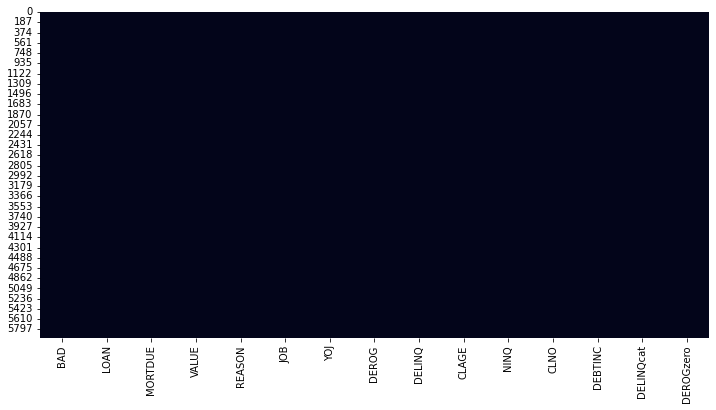

In [104]:
sns.heatmap(df.isnull(), cbar=False);  # quick visualization of the missing values in our data set

### Categorical features
Let's start with the two categorical features. The heatmap suggests that `REASON` exhibits more missing values than `JOB`. We will treat them differently for the sake of illustration. Now that we start altering our data frame more seriously, it is a good idea to make a copy of the data so that we can easily go back to a previous state.

In [105]:
# copy data
df_orig = df.copy()

One way to treat missing values in a categorical feature is to simply introduce a new category level. We will demonstrate this approach for the feature *REASON*. One feature of the category data type in Pandas is that category levels are managed. In a nutshell, we cannot change data or enter new data arbitrarily. Before assigning the missing values our new category level *IsMissing*, we first need to introduce this level. We basically tell our data frame that *IsMissing* is another suitable entry for *REASON* next to the levels that already exist in the data frame. 

In [106]:
# Variable REASON: we treat missing values as a new category level.
# First we need to add a new level
df.REASON.cat.add_categories(['IsMissing'], inplace=True)
# Now we can do the replacement
df.REASON[df.REASON.isnull() ] = "IsMissing"
df.REASON.head()

C:\temp\ipykernel_25012\2855356040.py:3: FutureWarning: The `inplace` parameter in pandas.Categorical.add_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  df.REASON.cat.add_categories(['IsMissing'], inplace=True)


ValueError: new categories must not include old categories: {'IsMissing'}

In [ ]:
df.REASON.isna().sum()  # verify that no more missing values exist

Ok, that worked. On to the next category. 
<br>
For the feature *JOB*, which is multinomial, we will use a different approach for illustration. We replace missing values with the mode (most frequent category level; just in case). That is actually a crude way to handle missing values but its used quite a lot. I'm not endorsing it! But you should have at least seen a demo. Here it is. 

In [ ]:
# Determine the mode
df.JOB.mode()

In [ ]:
# Alternatively
df.JOB.value_counts()

In [ ]:
# replace missing values with the mode
df.JOB[df.JOB.isnull() ] = df.JOB.mode()[0]  # the index [0] ensures that we only extract the value from the result of calling mode()
df.JOB.head()

In [ ]:
# Verify mising value replacement was successful
if df.REASON.isnull().any() == False and df.JOB.isnull().any() == False:
    print('well done!')
else:
    print('ups')

### Numerical features
We have a lot of numerical features. To keep things simple, we simply replace all missing values with the median. Again, this is  a crude approach that should be applied with utmost care if at all. However,  it nicely shows how we can process several columns at once using a loop. 

In [ ]:
for col in df.select_dtypes(include='float32').columns:  # loop over all numeric columns
    if df[col].isna().sum() > 0:                         # check if there are any missing values in the current feature
        m = df[col].median(skipna=True)                  # compute the median of that feature
        df[col].fillna(m, inplace=True)                  # replace missing values with the median

In [ ]:
# see if it worked, count again
df.isnull().sum().sum()

---

## Explanatory data analysis
Now that we are familiar with Pandas and have prepared out data, at least rudimentary, we can explore some of the plotting capabilities in Python. To that end, we go through an EDA pipeline and try to improve our understanding of the data along the way.
<br>

### Univariate analysis of categorical variables
In this part, we will examine  our target variable 'BAD', as well as the two categorical variables 'REASON' and 'JOB' individually. Firstly, we will count how many observations belong to each category of a variable. The function `value_counts()`, which we already saw above is probably the best choice to do that. We can also use it to process all categories in one go, as follows:

In [ ]:
df.select_dtypes(exclude='float32').apply(pd.Series.value_counts).fillna(0, downcast='infer')

<br>
While tables are a useful way to inspect data, graphs are often easier to interpret and more appealing. For categories, count plots and stacked count plots are common vehicles for data exploration. 

In [ ]:
# exluding data type float leaves us with the target variable and both categorical variables
for i, col in enumerate(df.select_dtypes(exclude='float32').columns):
    plt.figure(i)
    sns.countplot(x=col, data=df)

### Univariate analysis of numeric variables
Let us now take a closer look at the numeric variables and their distribution by means of histograms. Creating a histogram is easily achieved using the `hist()` function, which Pandas offers. We will use it below.
Dedicated plotting libraries offer a bit more flexibility. For start, we showcase functionality of the `Seaborn` library. We recommend this version when you examine a single variable at a time.

In [ ]:
# Demo of a histogram using Seaborn
sns.displot(df['CLAGE']);  # Explore the arguments that the function supports to discober variants of the plot

Next, we consider a basic histogram and use Pandas functionality to produce an overview of all the numeric variables in the data.

In [ ]:
plt.figure(figsize=(12,8))  # enlarge the figure
# We create one histogram for each numeric variable and illustrate how to set the number of bins
df.select_dtypes(include='float32').hist(bins=20); 

We observe many variables to have a long tail. This is very common in real data. Outliers also seem to be an issue in this data set. To get a clearer view on outliers let's inspect boxplots.

In [ ]:
# Nice way to do it quickly
num_vars = df.select_dtypes(include="float32")
df.boxplot(column=list(num_vars));

While the little amount of code in the above example is clearly nice, it is immediately clear that the above plot suffers from the fact that the numerical variables have different scale. Standardization could be a way to remedy this issue and we will look at it later. For now, we can extend our code to create one boxplot for each variable. 

In [ ]:
# One boxplot for each variable
num_vars = df.select_dtypes(include="float32")
half = np.ceil(num_vars.shape[1] / 2).astype(int)  # for cosmetic reasons we split the plots into two rows
num_vars.iloc[:, 0:half].plot(kind = 'box', subplots=True);
num_vars.iloc[:, half:num_vars.shape[1]].plot(kind = 'box', subplots=True);

#### Outlier handling
Ok, so outliers are indeed a problem. We will truncate them based on Tukey's rule of thumb. At this point, we can finally come back to the `.apply()` function and provide a more meaningful example of how to use it. Specifically, we implement a function that takes care of outlier truncation. We then `.apply()` this function to our data. In comparison to a loop, which facilitates the same type of operation, `.apply()` may be more and leads to more readable code. It is fair to say that `apply()` is often preferred over loops.

In [ ]:
# we first need our function to handle outliers 
def outlier_truncation(x, factor=1.5):
    '''
    Identifies outlier values based on the inter-quartile range IQR. 
    Corresponding outliers are truncated and set to a contant value equal to the IQR
    times a factor, which, following Tuckey's rule, we set to 1.5 by default
    
        Parameters:
            x (Pandas Series): A data frame column to scan for outliers
            factor (float): An outlier is a value this many times the IQR above q3/below q1
            
        Returns:
            Adjusted variable in which outliers are truncated
    '''
    x_new = x.copy()
    
    # Calculate IQR
    IQR = x.quantile(0.75) - x.quantile(0.25) 
    
    # Define upper/lower bound
    upper = x.quantile(0.75) + factor*IQR
    lower = x.quantile(0.25) - factor*IQR
    
    # Truncation
    x_new[x < lower] = lower
    x_new[x > upper] = upper
    
    return x_new

We could simply apply the above function to every numeric variable. This would work. However, if you go back to the boxplots, and look carefully, you may notice that some variables need special treatment. Consider the variable `DEROG`. If you simply truncate outliers in this variable, the result will be a constant. Make sure you understand why this is the case. We will leave such special cases for later and process the other less troublesome variables using our outlier truncation function.

In [ ]:
# Select numeric variables for outlier treatment. We could also use select_dtypes(). Do so if you prefer.
# The programming construct we use is called list comprehension and quite common in Python. Think of it
# as a more efficient way of writing loops
num_cols = [x for x in df.columns if df[x].dtype == 'float32' and x not in ['DEROG', 'DELINQ']]  

# Process every selected column using apply
# Updated 10.06.20 to show passing arguments to the 'applied' functions. Just send a tupel with arguments in the order as specified
# by the called function leaving out the first argument (see, https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.apply.html)
df[num_cols] = df[num_cols].apply(outlier_truncation, axis=0, args=(3,))  
df.describe()

Note how the maximum values have changed. You can also re-run the above code to create the boxplots and convince yourself that we have mitigated the outlier problem. 

#### Discretization of Numeric Variables

As seen in the boxplots above, we are facing some issues with the distribution of `DEROG` and `DELINQ`. Given their distribution, it seems appropriate to discretize these variables.  Discretization is the process of converting a numeric variable into a discrete variable, i.e., a category. Since both, `DEROG` and `DELINQ` display a large number of zeros, we could, for example, consider one category level *isZero* and another *IsGreaterThenZero*. This would give a binary variable. We can also introduce more category levels to obtain a fine-grained categorical representation of the original numbers. Normally, the function `qcut()` is a good choice to discretize a variable based on quantiles. We cannot demonstrate this with `DEROG` and `DELINQ` since their distributions do not warrant using quantiles as split points. 

In [ ]:
df.DEROG.hist();

In [ ]:
# Just an example to show the inappropriatness of using qcut for DEROG
pd.qcut(df.DEROG, q=1)  # any value for q > 1 will raise an error

In [ ]:
# Whereas with more distinct values, qcut would work just fine, e.g.
pd.qcut(df.CLAGE, 5)

Since quantile-based discretization is not an option, we go for a manual approach and start by a close look at the value counts for our two "problem variables". Category levels that occur very rarely can not help distinguish the good and bad payers. There are just too few observations to learn from. So, we inspect the frequency counts and decide which levels to merge. 

In [ ]:
df.DELINQ.value_counts()

In [ ]:
df.DEROG.value_counts()

How you proceed from here is based on judgment. We will exemplify two different techniques that could be considered in the focal case. For one variable we will create a dummy, indicating whether or not the value of the variable is 0. For the other variable we will group into three categories. As "DELINQ" shows fewer observations for the value 0, we will use this variable to divide into three groups: 0, 1 & >1. If you wish, this is a manual, or expert-based version of discretization in which we pick the boundaries of the buckets manually instead of picking them by looking at quantiles.  

In [ ]:
df['DELINQcat'] = '1+' #set default value to +1 for new variable 
df.loc[(df['DELINQ'] == 1), 'DELINQcat'] = '1' # change this value to 1, if value of DELINQ is 1
df.loc[(df['DELINQ'] == 0), 'DELINQcat'] = '0'
df['DELINQcat'] = df['DELINQcat'].astype('category')  # convert to categorical
df.DELINQcat.value_counts()

We will proceed similarly with the variable "DEROG". We will create a dummy variable where every observation has the value 1 (true) if their value for the "DEROG" variable was 0. Every other value will be assigned the value 0 (false).

In [ ]:
df['DEROGzero'] = 0 #set default to 0
df.loc[(df['DEROG'] == 0), 'DEROGzero'] = 1 #change to 1 if value of "DEROG" is 0 
df['DEROGzero'] = df['DEROGzero'].astype('bool')
df.DEROGzero.value_counts()

We are not done with our EDA workflow. However, we will not make any more changes to the data. Therefore, it is a good time to save a copy of the prepared data so that we can re-use it in subsequent coding sessions.

In [ ]:
# Store the data in the present, pre-processed format
df.to_csv('./hmeq_prepared.csv', index=False)

### Multivariate analysis of numeric variables

After gaining more knowledge about the variables individually, it is important to examine their relationships more closely. In data science, this is a good way of identifying redundant information as well as variable interactions. 
Next, we will plot a heatmap. It shows the correlation for all numeric variables. Highly correlated variables are redundant as they convey the same pieces of information.

In [ ]:
corr= df.corr()
f,ax = plt.subplots(figsize=(18, 15))
sns.heatmap(corr ,annot=True,linewidth=.5,fmt='1f');

Due to the amount of variables, it can be hard to make sense of the plot and spot the important variable relationships. We can solve this by filtering from a specific threshold. For example, we consider a threshold of $\rho=0.3$ below, and focus the plot to those variables whose pairwise correlation exceeds this threshold.

In [ ]:
f,ax = plt.subplots(figsize=(18, 15))
sns.heatmap(corr[(corr >= 0.30) | (corr <= -0.30)],
            annot=True);

If you have trust in the threshold, the above chart makes variable selection easy.

### Multivariate analysis of categorical variables

Categories and the binary target in particular are also useful to examine sub-groups. For example, we could calculate the mean of a/all numeric variables for good and bad borrowers. Enter `.groupby()`:

In [ ]:
df.groupby("BAD").mean()

Another standard operation when exploring categorical variables is to check cross-tabulations. Considering, for example, the variables `Reason`and `Job`, we can create a cross-tab as follows:

In [ ]:
pd.crosstab(df.REASON, df.JOB)

A cross-tab can be particularly informative when it includes the target variable. This way, we can spot whether certain category levels of the other (independent) variable are especially prominent with good or bad borrowers. In this use case, we would also want to switch from showing counts (as above) to showing relative frequencies.

In [ ]:
# This way of doing the cross-tab using a lambda function is still widely spread over the internet
job = pd.crosstab(df.JOB, df.BAD).apply(lambda r: r/r.sum(), axis=1)
#job = pd.crosstab(df.JOB, df.BAD)
job

In [ ]:
# But actually, you can make you life easier by studying the arguments that a function offers ;)
reason = pd.crosstab(df.REASON, df.BAD, normalize='index')
reason

Once again, we can also report the same information in a graphical way. A common way to display categorical variables is the stacked count plot. Let us analyze the variables `REASON` and `JOB` and how they are linked to the target variable.

In [ ]:
job = df.groupby(['BAD', 'JOB']).size().reset_index().pivot(columns='BAD', index='JOB', values=0)
                                                                       
job.plot(kind='bar', stacked=True);

In [ ]:
reason = df.groupby(['BAD', 'REASON']).size().reset_index().pivot(columns='BAD', index='REASON', values=0)
                                                                       
reason.plot(kind='bar', stacked=True); 

Let's do it one more time, this time showing the relative frequencies instead of the absolute counts. This might provide more insight into the variable distribution and how it differs across the two target groups (i.e., goods and bads)

In [ ]:
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
reason.div(reason.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True);


### Interactions between numeric and categorical variables 
Next, we can have a look at the distribution of our categories across the numerical variables. Violin plots are a great way to do so. The *seaborn* library makes creating these plots very easy. Below, we illustrate two options.

In [ ]:
# We use the category 'REASON' and create one plot for each numeric variable
for col  in df.select_dtypes(include='float32').columns:
    plt.figure()
    sns.violinplot(x='REASON', y=col, hue='BAD',
                   split=True, inner="quart",
                   data= df, subplots=True)



Let's repeat this for the variable 'JOB' but using a different approach

In [ ]:
# Repeat for category JOB
fig, axs = plt.subplots(3,3, figsize=(15, 10))
plt.tight_layout(pad=0.5, w_pad=4, h_pad=1.0)  
x = df.JOB

sns.violinplot(x=x, y="LOAN",  data=df,ax=axs[0,0])
sns.violinplot(x=x, y="MORTDUE", data=df,ax=axs[0,1])
sns.violinplot(x=x, y="VALUE", data=df,ax=axs[0,2])
sns.violinplot(x=x, y="YOJ", data=df,ax=axs[1,0])
sns.violinplot(x=x, y="DEROG", data=df,ax=axs[1,1])
sns.violinplot(x=x, y="CLAGE", data=df,ax=axs[1,2])
sns.violinplot(x=x, y="NINQ", data=df,ax=axs[2,0])
sns.violinplot(x=x, y="CLNO", data=df,ax=axs[2,1])
sns.violinplot(x=x, y="DEBTINC", data=df,ax=axs[2,2]);

### Playground
Just for fun, we illustrate some more exotic graphs below to sketch the capabilities of *seaborn*.

In [ ]:
# These variables showed a correlation above 0.30. So we can examine their relationship more deeply as follows:
sns.jointplot(x='CLNO',y='CLAGE',data=df, kind='kde');

In [ ]:
# We will stick with this example for comparability
df.plot.scatter(x='CLNO',y='CLAGE',c='LOAN');

In [ ]:
sns.swarmplot(df['BAD'], df['VALUE']);

# Conclusion

Learning how to display data in a meaningful and engaging way is an art as is good data pre-processing. You have to practice to become good at it. There are many more functionalities in the Python world which may come in handy. Keep up with updates on libraries and find some blogs whose graphics you find very easy to understand. You can practice implementing their code for your purposes. The possibilities are endless!

## Table of Useful Tricks

Many useful tricks with `pandas` (here `df` is a pandas DataFrame and `col` is one of its columns):

| Goal | Possible Code |
| --- | --- |
| Get df column (column name must have no spaces) | `df.col` |
| Get df column | `df["col"]` |
| Example condition: only select rows where `col1 > 1` | `df["col"] > 1` |
| Use index names to select rows and columns | `df.loc[row_list, col_list]` |
| Use index numbers to select rows and columns | `df.iloc[row_list, col_list]` |
| Get df column based on a condition | `df.loc[condition, ['col2','col3',...]]`|
| Group df by values of `col` | `df.groupby("col")` |
| Perform function on `col2` for each group of `col1` | `df.groupby("col1")["col2"].fun()` |
| Find value counts of each value in `col` | `df.groupby(['col']).size()`| 
| Get column mean and ignore null values | `df["col"].mean(skipna=True)` |
| Get column mode | `df["col"].mode()` |
| Get column median | `df["col"].median()` |
| Get rows of the 95th quantile of `col` | `df["col"].quantile(q=0.95)` |
| Filter `df` with a boolean condition | `df.query(condition)` |
| Create tally of `col2` by values of `col1` | `pd.crosstab(df['col1'], df['col2']`) |
| Pivot rows and columns | `df.pivot(index='col1', columns='col2', values='col3')` | 
| Sort values by `col` and save `df` in this order | `df.sort_values(by='col', inplace=True)` |
| Apply function to each column of `df` | `df.apply(fun)` |
| Save `df` as CSV in working directory | `df.to_csv('./file_name.csv', index=False)` |
| Count the number of times each value occurs | `df['col'].value_counts()` |
| Change column's data type | `df['col'] = df['col'].astype('type')` |
| Create boolean matrix of `df` where `True` indicates null value | `df.isnull()` | 
| Create boolean matrix of `df` where `True` indicates null value | `df.isna()` | 
| Create copy of df | `df_copy = df.copy()` |
| Add new category to categorical variable | `df.col.cat.add_categories(['New C'], inplace=True)` |
| Replace null values with `"IsMissing"` | `df.col[df.col.isnull()] = "IsMissing"` |
| Fill missing values with median and save `df` | `df['col'].fillna(median_value, inplace=True)` |
| Calculate time at execution (must import `time` library) | `time.time()` |

Plots for interesting visualizations:

| Goal | Possible Function |
| --- | --- |
| Heatmap of null values | `sns.heatmap(df.isnull(), cbar=False)` |
| Colored violin plot | `sns.violinplot(x='col1', y=col2, hue='col3', data= df)` |
| Density of two variables | `sns.jointplot(x='col1',y='col2',data=df, kind='kde')` |
| Swarmplot | `sns.swarmplot(df['col1'], df['col2'])` |
| Scatterplot shaded by third variable | `df.plot.scatter(x='col1',y='col2',c='col3')` |

* `sns` is the most common `seaborn` library abbreviation. It must be imported before calling its functions.